<a href="https://colab.research.google.com/github/ARJUN108-verma/Machine_Learning/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision Tree:-

A decision tree is a supervised learning algorithm used for both classification and regression tasks. It uses a flowchart-like structure to map out decisions and their possible consequences, with each branch representing a decision and each leaf node representing a final outcome or prediction.

In [207]:
import pandas as pd
import numpy as np

In [208]:
df = pd.read_csv('/content/heart.csv')

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [210]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [211]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [212]:
df.shape

(1025, 14)

In [213]:
df.duplicated().sum()

np.int64(723)

In [214]:
x = df.drop('target', axis=1)
y = df['target']

In [215]:
#split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state=42)

In [216]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
949,57,1,0,132,207,0,1,168,1,0.0,2,0,3
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
94,62,1,1,128,208,1,0,140,0,0.0,2,0,2
33,70,1,2,160,269,0,1,112,1,2.9,1,1,3
259,66,1,0,120,302,0,0,151,0,0.4,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,41,1,2,130,214,0,0,168,0,2.0,1,0,2
71,61,1,0,140,207,0,0,138,1,1.9,2,1,3
106,51,1,0,140,299,0,1,173,1,1.6,2,0,3
270,43,1,0,110,211,0,1,161,0,0.0,2,0,3


In [217]:
y_train

,target
949,1
1021,0
94,1
33,0
259,1
...,...
700,1
71,0
106,0
270,1


In [218]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth= 3)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [219]:
model.score(x_train, y_train)

0.8528645833333334

In [220]:
pred = model.predict(x_test)

In [221]:
from sklearn.metrics import classification_report

In [222]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.70      0.77       132
           1       0.74      0.89      0.80       125

    accuracy                           0.79       257
   macro avg       0.80      0.79      0.79       257
weighted avg       0.80      0.79      0.79       257



[Text(0.5, 0.875, 'cp <= 0.5\ngini = 0.499\nsamples = 768\nvalue = [367, 401]\nclass = No Disease'),
 Text(0.25, 0.625, 'ca <= 0.5\ngini = 0.378\nsamples = 368\nvalue = [275, 93]\nclass = No Disease'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'thal <= 2.5\ngini = 0.499\nsamples = 162\nvalue = [77, 85]\nclass = No Disease'),
 Text(0.0625, 0.125, 'gini = 0.338\nsamples = 93\nvalue = [20, 73]\nclass = No Disease'),
 Text(0.1875, 0.125, 'gini = 0.287\nsamples = 69\nvalue = [57, 12]\nclass = No Disease'),
 Text(0.375, 0.375, 'trestbps <= 109.0\ngini = 0.075\nsamples = 206\nvalue = [198.0, 8.0]\nclass = No Disease'),
 Text(0.3125, 0.125, 'gini = 0.426\nsamples = 13\nvalue = [9, 4]\nclass = No Disease'),
 Text(0.4375, 0.125, 'gini = 0.041\nsamples = 193\nvalue = [189, 4]\nclass = No Disease'),
 Text(0.75, 0.625, 'thal <= 2.5\ngini = 0.354\nsamples = 400\nvalue = [92, 308]\nclass = No Disease'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'oldpeak <= 2.1\ngini = 0.231\nsamples 

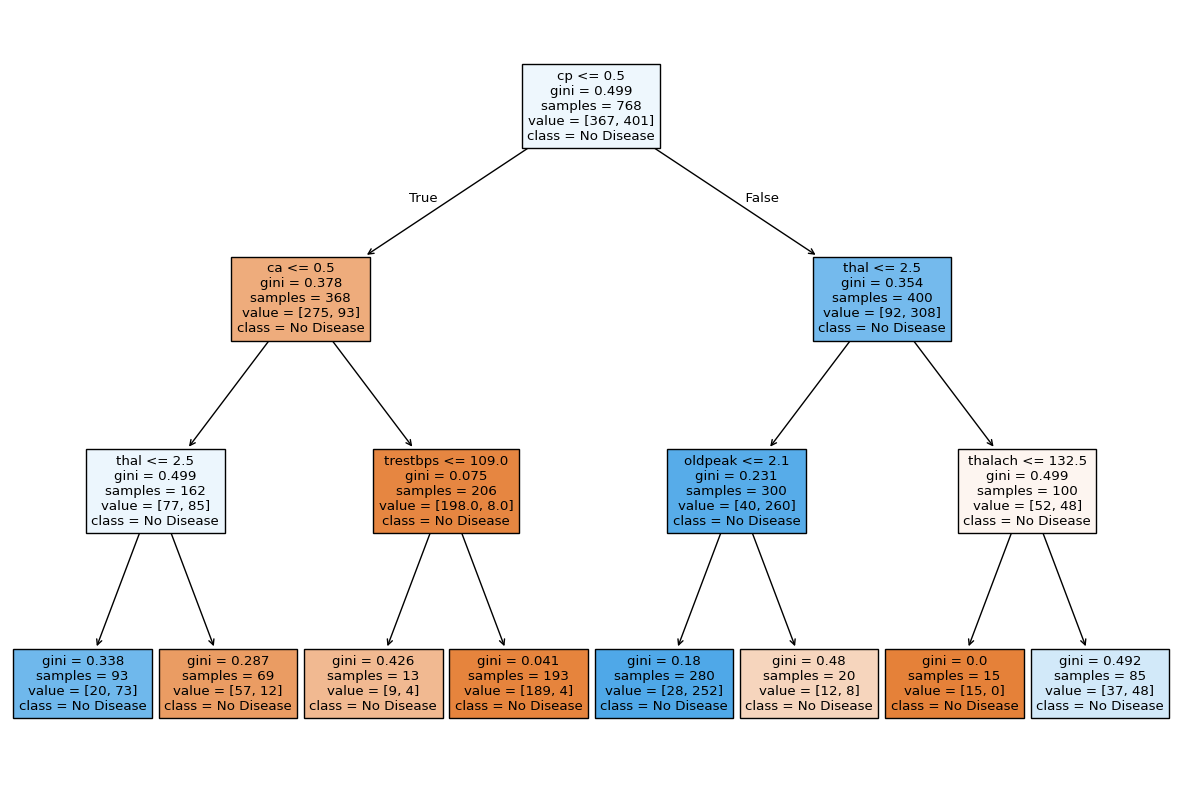

In [223]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
from sklearn import tree
tree.plot_tree(model, filled=True, feature_names=x.columns, class_names= y.map({0:'No Disease', 1:'Disease'}))

Decision Tree Regression

In [224]:
from sklearn.datasets import fetch_california_housing

In [225]:
df1 = fetch_california_housing()

In [226]:
print(df1.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [227]:
x = df1.data
y = df1.target

In [228]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [229]:
x_scaled = sc.fit_transform(x)

In [237]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size= 0.3, random_state=42)

In [238]:
x_train

array([[ 0.13713671,  0.50539419,  0.18323866, ..., -0.00821902,
        -0.79678867,  0.7735051 ],
       [-0.53036314, -0.68647699, -0.41541756, ..., -0.10172952,
        -1.33052136,  1.23769666],
       [ 0.1747201 , -0.36864468,  0.07620675, ..., -0.04869562,
        -0.48778553, -0.28465202],
       ...,
       [-0.49283239,  0.58485227, -0.58294927, ...,  0.02517025,
        -0.74997001,  0.59381804],
       [ 0.97302487, -1.08376738,  0.39058403, ...,  0.01042151,
         0.91209231, -1.19306993],
       [-0.68174943,  1.85618152, -0.81905034, ..., -0.09262259,
         1.00104776, -1.42267006]])

In [249]:
from sklearn.tree import DecisionTreeRegressor
model1 = DecisionTreeRegressor(max_depth= 10)
model1.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [250]:
prede = model1.predict(x_test)

In [251]:
model1.score(x_train, y_train)

0.8367082276767659

[Text(0.5514391447368421, 0.9545454545454546, 'x[0] <= 0.611\nsquared_error = 1.34\nsamples = 14448\nvalue = 2.069'),
 Text(0.2802279135338346, 0.8636363636363636, 'x[0] <= -0.419\nsquared_error = 0.835\nsamples = 11340\nvalue = 1.73'),
 Text(0.41583352913533833, 0.9090909090909092, 'True  '),
 Text(0.1307918233082707, 0.7727272727272727, 'x[2] <= -0.496\nsquared_error = 0.565\nsamples = 5490\nvalue = 1.356'),
 Text(0.0643796992481203, 0.6818181818181818, 'x[5] <= -0.061\nsquared_error = 0.701\nsamples = 2018\nvalue = 1.664'),
 Text(0.035291353383458644, 0.5909090909090909, 'x[6] <= 1.076\nsquared_error = 1.065\nsamples = 594\nvalue = 2.096'),
 Text(0.019830827067669175, 0.5, 'x[7] <= 0.651\nsquared_error = 1.071\nsamples = 505\nvalue = 2.237'),
 Text(0.009962406015037594, 0.4090909090909091, 'x[7] <= -1.38\nsquared_error = 1.171\nsamples = 303\nvalue = 2.582'),
 Text(0.004887218045112782, 0.3181818181818182, 'x[3] <= 0.181\nsquared_error = 1.315\nsamples = 39\nvalue = 3.416'),
 Text(0

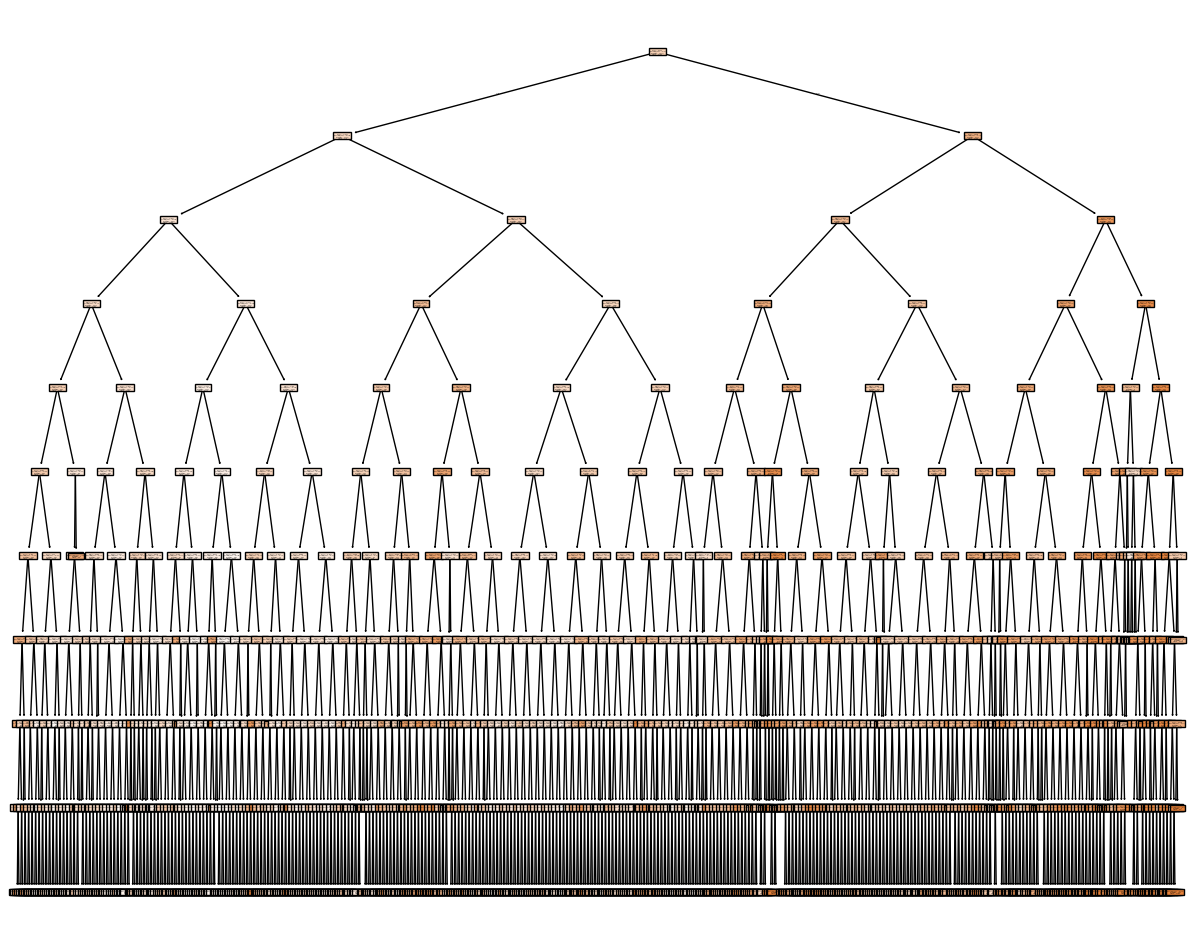

In [252]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 12))
from sklearn import tree
tree.plot_tree(model1, filled = True)